In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("bmi.csv")

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [6]:
data.shape

(10000, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [11]:
x = np.array(data['Height']).reshape(-1, 1)
y = np.array(data['Weight']).reshape(-1, 1)

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=2,test_size=0.3)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [14]:
regr=linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred=regr.predict(test_x)

In [15]:
print('Accuracy: '+str(regr.score(test_x,test_y)*100)+'%')

Accuracy: 85.51318824413157%


In [16]:
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))

Mean absolute error: 9.80363255811372


In [17]:
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))

Mean squared error: 151.07973989929943


In [18]:
R2=r2_score(test_y,y_pred)
print('R squared: {}'.format(R2))

R squared: 0.8551318824413157


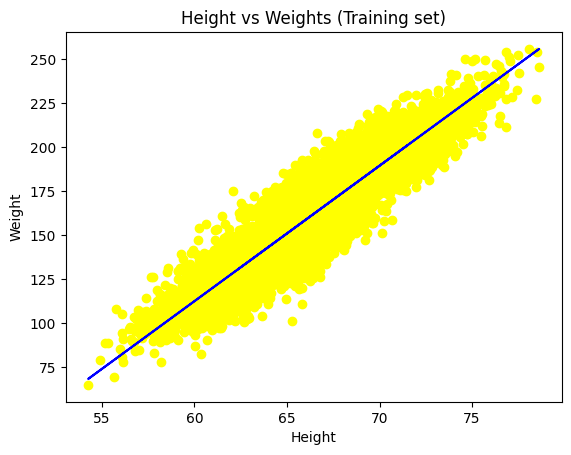

In [20]:
# Visualising the Training set results
import matplotlib.pyplot as plt
plt.scatter(train_x,train_y, color = 'Yellow')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.title('Height vs Weights (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

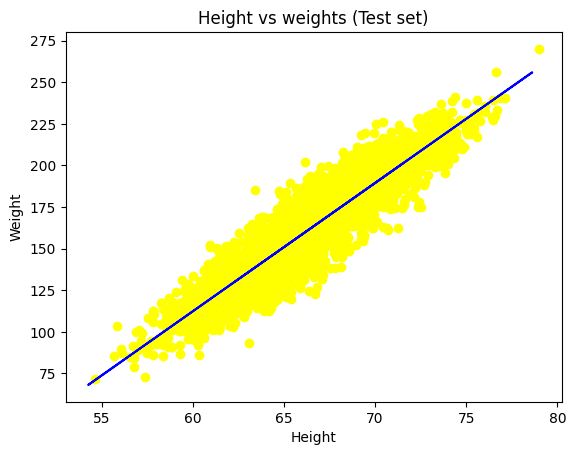

In [21]:
# Visualising the Test set results
plt.scatter(test_x,test_y, color = 'Yellow')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.title('Height vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()